In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!kaggle datasets download -d dansbecker/melbourne-housing-snapshot

Dataset URL: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
License(s): CC-BY-NC-SA-4.0
melbourne-housing-snapshot.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile

with zipfile.ZipFile("melbourne-housing-snapshot.zip", "r") as zip_ref:
    zip_ref.extractall("melbourne_data")


In [2]:
df = pd.read_csv("melbourne_data/melb_data.csv")
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df['Address'].nunique()

13378

In [7]:
df['Suburb'].nunique()

314

In [12]:
df.groupby('Suburb')['Price'].mean()

Suburb
Abbotsford      1.060366e+06
Aberfeldie      1.277455e+06
Airport West    7.566567e+05
Albanvale       5.370833e+05
Albert Park     1.941355e+06
                    ...     
Wonga Park      9.000000e+05
Wyndham Vale    4.832500e+05
Yallambie       8.396875e+05
Yarra Glen      6.200000e+05
Yarraville      9.886155e+05
Name: Price, Length: 314, dtype: float64

In [3]:
suburb_price_mean = df.groupby('Suburb')['Price'].mean()
suburb_price_quartiles = pd.qcut(suburb_price_mean, q=4, labels=['Sub_A', 'Sub_B', 'Sub_C', 'Sub_D'])

In [4]:
df['Price_Quartile'] = df['Suburb'].map(suburb_price_quartiles)
quartile_dummies = pd.get_dummies(df['Price_Quartile'], prefix='Quartile').astype(int)

In [5]:
df = pd.concat([df, quartile_dummies], axis=1)

C:\Users\Taif Al Ghazali\AppData\Local\Temp\ipykernel_10396\933494986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby('Price_Quartile')['Price'].mean()).plot(kind='bar')


<Axes: xlabel='Price_Quartile'>

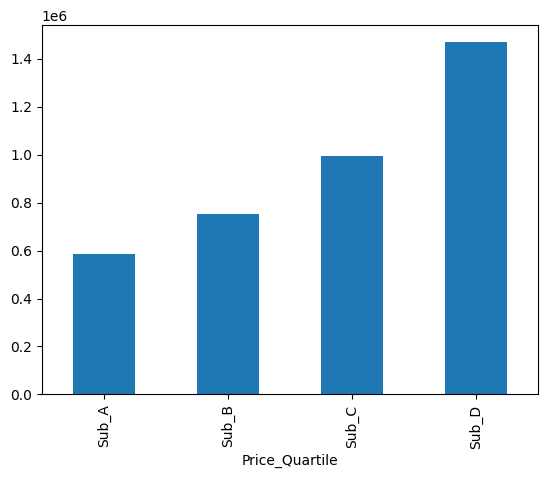

In [11]:
(df.groupby('Price_Quartile')['Price'].mean()).plot(kind='bar')

In [16]:
seller_price_mean= df.groupby('SellerG')['Price'].mean()
seller_price_quartiles = pd.qcut(seller_price_mean, q=4, labels=['A', 'B', 'C', 'D'])

In [17]:
df['Seller_Quartile'] = df['SellerG'].map(seller_price_quartiles)

In [19]:
(df.groupby('Seller_Quartile')['Price'].mean())

C:\Users\Taif Al Ghazali\AppData\Local\Temp\ipykernel_10396\707254448.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby('Seller_Quartile')['Price'].mean())


Seller_Quartile
A    5.786193e+05
B    7.731443e+05
C    9.664080e+05
D    1.448765e+06
Name: Price, dtype: float64

In [21]:
quartile_dummies = pd.get_dummies(df['Seller_Quartile'], prefix='Quartile').astype(int)

In [22]:
df = pd.concat([df, quartile_dummies], axis=1)

In [23]:
df.drop(['Address', 'Suburb', 'SellerG'], axis =1, inplace= True)

In [25]:
df.drop(['Price_Quartile', 'Seller_Quartile'], axis=1, inplace= True)

df.info()

# **Geographic Plots**

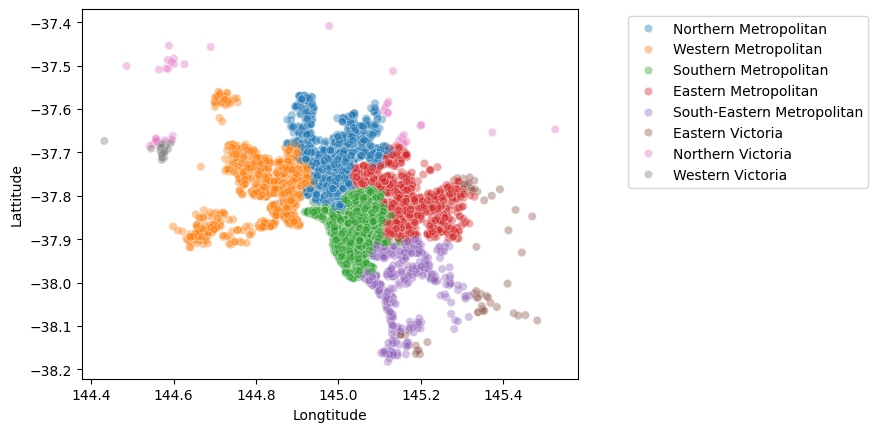

In [25]:
sns.scatterplot(df,x="Longtitude", y="Lattitude", alpha= 0.4, hue="Regionname")
plt.legend( bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))

Text(0.5, 1.0, 'Melbourne Housing Prices by Location')

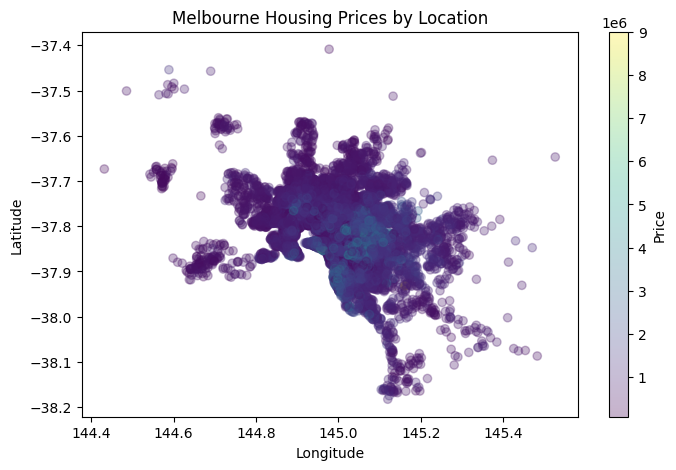

In [28]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(data=df, x='Longtitude', y='Lattitude', 
                      c=df['Price'], cmap='viridis', alpha=0.3)
plt.colorbar(scatter, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Melbourne Housing Prices by Location')

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

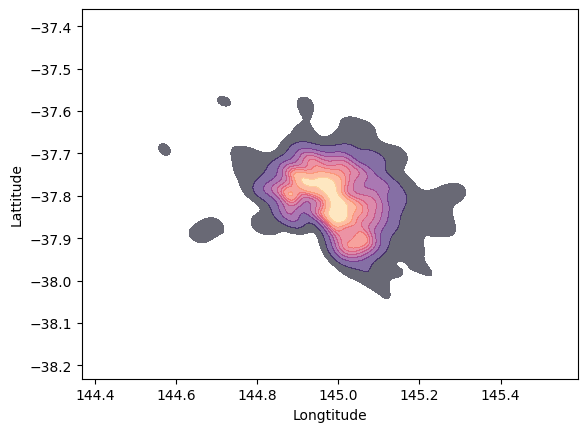

In [29]:
sns.kdeplot(data=df, x='Longtitude', y='Lattitude', cmap="magma", fill=True, alpha=0.6)


In [30]:
df['Year'] = pd.to_datetime(df['Date'], dayfirst=True).dt.year

In [31]:
df['Method'].nunique()

5

In [33]:
df['Method'].value_counts()

Method
S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: count, dtype: int64

<Axes: xlabel='Method'>

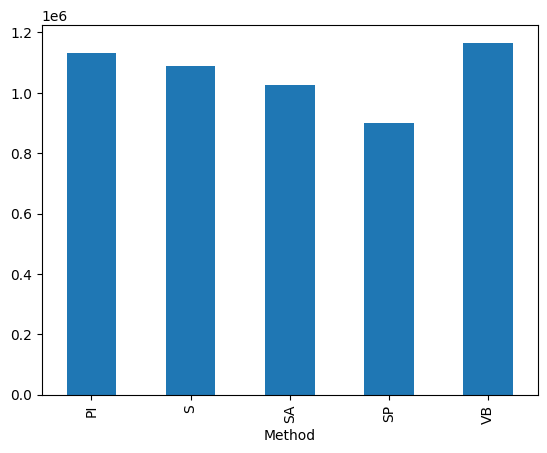

In [38]:
df.groupby('Method')['Price'].mean().plot(kind='bar')

In [32]:
df['Type'].nunique()

3

In [34]:
df['Type'].value_counts()

Type
h    9449
u    3017
t    1114
Name: count, dtype: int64

<Axes: xlabel='Type'>

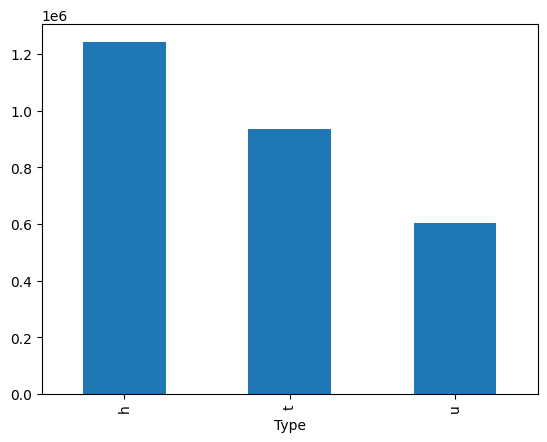

In [40]:
df.groupby('Type')['Price'].mean().plot(kind='bar')

### Seems like we can drop the Method feature, simply adds noise

In [42]:
type_dums = pd.get_dummies(df['Type']).astype(int)

In [43]:
type_dums

h  t  u
0      1  0  0
1      1  0  0
2      1  0  0
3      1  0  0
4      1  0  0
...   .. .. ..
13575  1  0  0
13576  1  0  0
13577  1  0  0
13578  1  0  0
13579  1  0  0

[13580 rows x 3 columns]

In [44]:
df = pd.concat([df, type_dums], axis=1)

In [45]:
df.drop(['Date', 'Method', 'Type'], axis=1, inplace= True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms           13580 non-null  int64  
 1   Price           13580 non-null  float64
 2   Distance        13580 non-null  float64
 3   Postcode        13580 non-null  float64
 4   Bedroom2        13580 non-null  float64
 5   Bathroom        13580 non-null  float64
 6   Car             13518 non-null  float64
 7   Landsize        13580 non-null  float64
 8   BuildingArea    7130 non-null   float64
 9   YearBuilt       8205 non-null   float64
 10  CouncilArea     12211 non-null  object 
 11  Lattitude       13580 non-null  float64
 12  Longtitude      13580 non-null  float64
 13  Regionname      13580 non-null  object 
 14  Propertycount   13580 non-null  float64
 15  Quartile_Sub_A  13580 non-null  int32  
 16  Quartile_Sub_B  13580 non-null  int32  
 17  Quartile_Sub_C  13580 non-null 

In [47]:
df.isna().sum()

Rooms                0
Price                0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                 62
Landsize             0
BuildingArea      6450
YearBuilt         5375
CouncilArea       1369
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
Quartile_Sub_A       0
Quartile_Sub_B       0
Quartile_Sub_C       0
Quartile_Sub_D       0
Quartile_A           0
Quartile_B           0
Quartile_C           0
Quartile_D           0
Year                 0
h                    0
t                    0
u                    0
dtype: int64

In [48]:
df['Car'].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [49]:
df.corr(numeric_only=True)['Car'].sort_values(ascending= False)

Car               1.000000
Rooms             0.408483
Bedroom2          0.405325
Bathroom          0.322246
Distance          0.262994
h                 0.252442
Price             0.238979
YearBuilt         0.104515
BuildingArea      0.096101
Year              0.082920
Quartile_Sub_B    0.071423
Quartile_B        0.067428
Quartile_Sub_A    0.063552
Longtitude        0.063395
Postcode          0.050289
Quartile_Sub_D    0.027891
Landsize          0.026770
Quartile_D        0.007211
Lattitude        -0.001963
t                -0.016942
Quartile_A       -0.020974
Propertycount    -0.024295
Quartile_C       -0.047015
Quartile_Sub_C   -0.128853
u                -0.268123
Name: Car, dtype: float64

In [50]:
grouped_by_room = df.groupby('Rooms')['Car'].mean()

In [51]:
def fill_car(room, car):
    if np.isnan(car):
        return grouped_by_room[room]
    else:
        return car

In [52]:
df['Car'] = df.apply(lambda t: fill_car(t['Rooms'], t['Car']), axis =1)

In [53]:
df.corr(numeric_only=True)['BuildingArea'].sort_values(ascending= False)

BuildingArea      1.000000
Landsize          0.500485
Rooms             0.124127
Bedroom2          0.122319
Bathroom          0.111933
Distance          0.099481
Car               0.096170
Price             0.090981
h                 0.067344
Postcode          0.055475
Quartile_Sub_D    0.052593
Lattitude         0.043420
Quartile_B        0.023638
YearBuilt         0.019665
Year              0.014080
Quartile_D        0.009778
Quartile_Sub_A   -0.007018
t                -0.007190
Quartile_A       -0.011966
Quartile_Sub_B   -0.017277
Quartile_C       -0.021408
Longtitude       -0.023810
Propertycount    -0.028840
Quartile_Sub_C   -0.033123
u                -0.070368
Name: BuildingArea, dtype: float64

In [54]:
corr = df.corr(numeric_only=True)

In [55]:
df['Landsize'].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [56]:
df['Landsize'].sort_values(ascending= False)[:10]

11020    433014.0
10504     76000.0
687       75100.0
13245     44500.0
5194      41400.0
11371     40468.0
10045     38490.0
3942      37000.0
9223      37000.0
8241      21715.0
Name: Landsize, dtype: float64

In [62]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000, 10000, 40000]
labels = range(len(bins) - 1)
arr = []


In [72]:
df[(df['Landsize'] <bins[i+1]) & (df['Landsize'] >= bins[i])  ]

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
3          3   850000.0       2.5    3067.0       3.0       2.0  1.0   
8          1   300000.0       2.5    3067.0       1.0       1.0  1.0   
10         2   700000.0       2.5    3067.0       2.0       2.0  1.0   
12         2   750000.0       2.5    3067.0       2.0       2.0  1.0   
14         1   441000.0       2.5    3067.0       1.0       1.0  1.0   
...      ...        ...       ...       ...       ...       ...  ...   
12664      2   640000.0       5.2    3056.0       2.0       1.0  1.0   
12829      3  1500000.0       2.4    3121.0       3.0       2.0  2.0   
12843      1   855000.0       1.9    3205.0       1.0       1.0  0.0   
13118      2   653000.0      10.9    3128.0       2.0       1.0  1.0   
13267      3  1463000.0       4.6    3181.0       3.0       2.0  2.0   

       Landsize  BuildingArea  YearBuilt  ... Quartile_Sub_C  Quartile_Sub_D  \
3          94.0           NaN        NaN  ...              1               0   
8           0.0           NaN        NaN  ...              1               0   
10          0.0           NaN        NaN  ...              1               0   
12          0.0          94.0     2009.0  ...              1               0   
14          0.0           NaN        NaN  ...              1               0   
...         ...           ...        ...  ...            ...             ...   
12664      82.0           2.0        NaN  ...              1               0   
12829      72.0         145.0     2011.0  ...              1               0   
12843      67.0          72.0     1900.0  ...              0               1   
13118      84.0          77.0     1970.0  ...              0               1   
13267      15.0         147.0     1998.0  ...              1               0   

       Quartile_A Quartile_B  Quartile_C  Quartile_D  Year  h  t  u  
3               0          0           1           0  2017  1  0  0  
8               0          0           1           0  2016  0  0  1  
10              0          0           0           1  2016  0  0  1  
12              0          0           1           0  2016  0  0  1  
14              0          0           0           1  2016  0  0  1  
...           ...        ...         ...         ...   ... .. .. ..  
12664           0          1           0           0  2017  0  1  0  
12829           0          0           0           1  2017  0  1  0  
12843           0          0           0           1  2017  1  0  0  
13118           0          0           1           0  2017  0  0  1  
13267           0          0           0           1  2017  0  1  0  

[2248 rows x 27 columns]

In [73]:
for i in labels:
    arr.append(df[(df['Landsize'] <bins[i+1]) & (df['Landsize'] >= bins[i])]['BuildingArea'].mean())

In [74]:
labels

range(0, 13)

In [76]:
arr.append(df[df['Landsize'] > 40000]['BuildingArea'].mean())

In [79]:
def fill_building(land,building):
    if np.isnan(building):
        for i in labels:
            if (land < bins[i+1]):
                return arr[i]
    else:
        return building

In [80]:
df['BuildingArea'] = df.apply(lambda t: fill_building(t['Landsize'], t['BuildingArea']), axis =1)

In [84]:
df.groupby('YearBuilt')['Price'].mean().sort_values()

YearBuilt
1976.0    6.114545e+05
1987.0    6.852500e+05
1872.0    6.900000e+05
1970.0    7.279436e+05
1975.0    7.608938e+05
              ...     
1854.0    3.310000e+06
1893.0    3.335000e+06
1903.0    3.455000e+06
1863.0    4.125000e+06
1884.0    5.046000e+06
Name: Price, Length: 144, dtype: float64

In [ ]:
df[]

In [85]:
corr['YearBuilt'].sort_values(ascending= False)

YearBuilt         1.000000
t                 0.294490
Distance          0.246379
u                 0.236252
Quartile_Sub_A    0.162283
Bathroom          0.152702
Quartile_Sub_B    0.127069
Year              0.106829
Car               0.104642
Quartile_A        0.096936
Quartile_B        0.081828
Lattitude         0.060445
Landsize          0.036451
Postcode          0.032863
Quartile_C        0.029780
BuildingArea      0.019665
Propertycount     0.006361
Longtitude       -0.003470
Bedroom2         -0.053319
Rooms            -0.065413
Quartile_Sub_C   -0.078219
Quartile_Sub_D   -0.127229
Quartile_D       -0.128759
Price            -0.323617
h                -0.395572
Name: YearBuilt, dtype: float64

In [87]:
df.groupby('Distance')['YearBuilt'].mean()

Distance
0.0     1987.800000
0.7     2002.333333
1.2     2000.714286
1.3     1971.500000
1.5     1970.000000
           ...     
45.2    2009.000000
45.9    1966.600000
47.3    2007.500000
47.4    2011.000000
48.1            NaN
Name: YearBuilt, Length: 202, dtype: float64

In [89]:
grouped_by_dist= df.groupby('Distance')['YearBuilt'].mean().dropna()

In [90]:
def fill_yearBuilt(dist, year):
    if np.isnan(year):
        return grouped_by_dist(dist)
    else:
        return year

In [91]:
df['YearBuilt'] = df.apply(lambda t: fill_building(t['Distance'], t['YearBuilt']), axis =1)

CouncilArea
Banyule              Axes(0.125,0.11;0.775x0.77)
Bayside              Axes(0.125,0.11;0.775x0.77)
Boroondara           Axes(0.125,0.11;0.775x0.77)
Brimbank             Axes(0.125,0.11;0.775x0.77)
Cardinia             Axes(0.125,0.11;0.775x0.77)
Casey                Axes(0.125,0.11;0.775x0.77)
Darebin              Axes(0.125,0.11;0.775x0.77)
Frankston            Axes(0.125,0.11;0.775x0.77)
Glen Eira            Axes(0.125,0.11;0.775x0.77)
Greater Dandenong    Axes(0.125,0.11;0.775x0.77)
Hobsons Bay          Axes(0.125,0.11;0.775x0.77)
Hume                 Axes(0.125,0.11;0.775x0.77)
Kingston             Axes(0.125,0.11;0.775x0.77)
Knox                 Axes(0.125,0.11;0.775x0.77)
Macedon Ranges       Axes(0.125,0.11;0.775x0.77)
Manningham           Axes(0.125,0.11;0.775x0.77)
Maribyrnong          Axes(0.125,0.11;0.775x0.77)
Maroondah            Axes(0.125,0.11;0.775x0.77)
Melbourne            Axes(0.125,0.11;0.775x0.77)
Melton               Axes(0.125,0.11;0.775x0.77)
Monash  

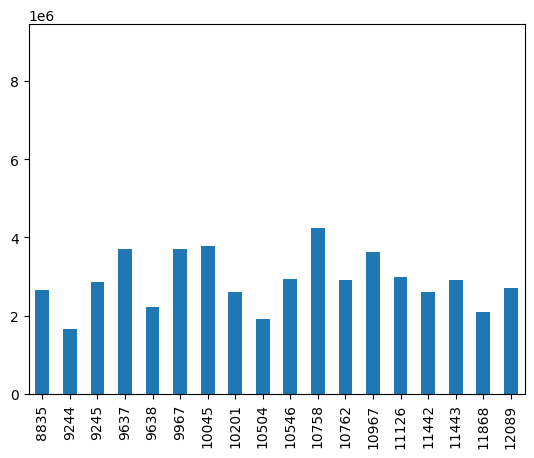

In [93]:
df.groupby('CouncilArea')['Price'].plot(kind='bar')

### Does not seem super relevant, we can drop CouncilArea

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rooms           13580 non-null  int64  
 1   Price           13580 non-null  float64
 2   Distance        13580 non-null  float64
 3   Postcode        13580 non-null  float64
 4   Bedroom2        13580 non-null  float64
 5   Bathroom        13580 non-null  float64
 6   Car             13580 non-null  float64
 7   Landsize        13580 non-null  float64
 8   BuildingArea    13575 non-null  float64
 9   YearBuilt       13580 non-null  float64
 10  CouncilArea     12211 non-null  object 
 11  Lattitude       13580 non-null  float64
 12  Longtitude      13580 non-null  float64
 13  Regionname      13580 non-null  object 
 14  Propertycount   13580 non-null  float64
 15  Quartile_Sub_A  13580 non-null  int32  
 16  Quartile_Sub_B  13580 non-null  int32  
 17  Quartile_Sub_C  13580 non-null 

In [96]:
df.drop('CouncilArea', axis=1, inplace= True)

In [98]:
df.dropna(subset = ['BuildingArea'], inplace=True)

In [101]:
region_dummed  = pd.get_dummies(df['Regionname']).astype(int)

In [103]:
df= pd.concat([df,region_dummed], axis=1)

In [104]:
df.drop('Regionname', axis=1, inplace=True)

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
 X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.33, random_state=42)

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [109]:
reg.fit(X_train, y_train)

LinearRegression()

In [110]:
predictions= reg.predict(X_test)

In [111]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, predictions)

In [112]:
rmse

385185.1776718262

In [113]:
rmse / df['Price'].mean()

0.3581277171868324